# 无监督学习专题 —— 聚类

### 无监督学习简介

利用无标签的数据学习数据的分布或数据与数据之间的关系被称作无监督学习。

    • 有监督学习和无监督学习的最大区别在于数据是否有标签
    • 无监督学习最常应用的场景是聚类(clustering)和降维(Dimension Reduction)

## A1 聚类

聚类(clustering)，就是根据数据的“相似性”将数据分为多类的过程。

评估两个不同样本之间的“相似性” ，通常使用的方法就是计算两个样本之间的“距离”。

使用不同的方法计算样本间的距离会关系到聚类结果的好坏。

##### 1.欧氏距离

欧氏距离是最常用的一种距离度量方法，源于欧式空间中两点的距离。

其计算方法如下：
![](Pic/ou.JPG)

##### 2.曼哈顿距离

曼哈顿距离也称作“城市街区距离”，类似于在城市之中驾车行驶，
从一个十字路口到另外一个十字楼口的距离。其计算方法如下：

![](Pic/mhd.JPG)

##### 3.马氏距离

马氏距离表示数据的协方差距离，
是一种尺度无关的度量方式。也就是说马氏距离会先将样本点的各个属性标准化，再计算样本间的距离。其计算方式如下：（s是协方差矩阵，如图）

![](Pic/mas.JPG)

##### 4.夹角余弦

余弦相似度用向量空间中两个向量夹角的余弦值作为衡量两个样本差异的大小。余弦值越接近1，说明两个向量夹角越接近0度，表明两个向量越相似。其计算方法如下：

![](Pic/cos.JPG)

### sklearn.cluster 中的聚类算法

scikit-learn库（以后简称sklearn库）提供的常用聚类算法函数包含在

sklearn.cluster这个模块中，如：K-Means，
近邻传播算法，DBSCAN，等。

 以同样的数据集应用于不同的算法，可能会得到不同的结果，算法所耗费的时间也不尽相同，这是由算法的特性决定的。

**sklearn.cluster模块提供的各聚类算法函数可以使用不同的数据形式作为输入**

标准数据输入格式:[样本个数，特征个数]定义的矩阵形式。

相似性矩阵输入格式：即由[样本数目，样本数目]定义的矩阵形式，矩阵中的每一个元素为两个样本的相似度，
如DBSCAN， AffinityPropagation(近邻传播算法)接受这种输入。

如果以余弦相似度为例，则对角线元素全为1. 矩阵中每个元素的取值范围为[0,1]

图片显示：

![](Pic/sum.JPG)

### 聚类样例1 KMeans

介绍：K-means聚类算法

k-means算法以k为参数，把n个对象分成k个簇，使簇内具有较高的相似
度，而簇间的相似度较低。

其处理过程如下：

    1.随机选择k个点作为初始的聚类中心；
    2.对于剩下的点，根据其与聚类中心的距离，将其归入最近的簇
    3.对每个簇，计算所有点的均值作为新的聚类中心
    4.重复2、3直到聚类中心不再发生改变

### 数据集简介

数据链接： [https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

数据介绍：  《2021年世界幸福报告》

幸福分数和排名使用盖洛普世界投票的数据。
幸福分数后面的各栏估计了六个因素（经济生产，社会支持，预期寿命，
自由，没有腐败和慷慨）中每个因素在多大程度上有助于使每个国家的生活评估高于反乌托邦。
对于六个因素中的每一个，
其假设值都等于世界最低的国家平均值的假设国家。
它们对每个国家/地区的总分数没有影响，
但是确实解释了为什么某些国家的排名高于其他国家。

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

#### 第三方库导入

In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import os
os.getcwd()

'F:\\Data-Mining-Access\\Summary-Of-Machine-Learning\\A.unsupervised-learning'

导入相关的表格并查看

表格名称： **world-happiness-report-2021.csv**

In [33]:
f = pd.read_csv('world-happiness-report-2021.csv')
f


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


##### 数据预处理

1.判断缺失值并处理。这里考虑，如果确实的有缺失，考虑去掉整行或者加一个影响不大的参数

In [34]:
print("测试数据判断每个特征是否存在缺失值")
print(f.isnull().any())

测试数据判断每个特征是否存在缺失值
Country name                                  False
Regional indicator                            False
Ladder score                                  False
Standard error of ladder score                False
upperwhisker                                  False
lowerwhisker                                  False
Logged GDP per capita                         False
Social support                                False
Healthy life expectancy                       False
Freedom to make life choices                  False
Generosity                                    False
Perceptions of corruption                     False
Ladder score in Dystopia                      False
Explained by: Log GDP per capita              False
Explained by: Social support                  False
Explained by: Healthy life expectancy         False
Explained by: Freedom to make life choices    False
Explained by: Generosity                      False
Explained by: Perceptions of corruption       

没有缺失值，总体OK，现在尝试查看异常值


In [35]:
print("Standard error of ladder score")
print(f["Standard error of ladder score"].to_frame().describe())

print("Healthy life expectancy")
print(f["Healthy life expectancy"].to_frame().describe())

Standard error of ladder score
       Standard error of ladder score
count                      149.000000
mean                         0.058752
std                          0.022001
min                          0.026000
25%                          0.043000
50%                          0.054000
75%                          0.070000
max                          0.173000
Healthy life expectancy
       Healthy life expectancy
count               149.000000
mean                 64.992799
std                   6.762043
min                  48.478000
25%                  59.802000
50%                  66.603000
75%                  69.600000
max                  76.953000


其他检查类似，总体的数据良好，没有出现异常的情况，接下来尝试进行KMeans模型

说明：调用KMeans方法所需参数：

    • n_clusters：用于指定聚类中心的个数
    • init：初始聚类中心的初始化方法
    • max_iter：最大的迭代次数
    • 一般调用时只用给出n_clusters即可，init默认是k-means++，max_iter默认是300

其它参数：

    • data：加载的数据
    • label：聚类后各数据所属的标签
    • axis: 按行求和
    • fit_predict()：计算簇中心以及为簇分配序号


In [36]:
CityName = f['Country name'].values
print(CityName)
retData = f.iloc[:,2:]
retData

['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 'Indonesia' 'Congo (Brazzaville)' 

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


上面的代码是对相关的数据进行对K-Means的预备处理，
获得到城市的名称数据和相关的参数

请注意，f.iloc[:,2:]表示获取的是获取第3列开始的数据进行训练，
如果把文本都涉及进去会导致直接出现异常

**ValueError: could not convert string to float: 'Western Europe'**

下面是进行编码实现聚类的操作，
输入值选择n聚类后通过类似梯度的方式层层显示对应的结果，对幸福指数的国家进行简单分类

In [37]:
def km(n):
    '''

    :param n:
    :return:
    '''
    lab = []
    km = KMeans(n_clusters=n)
    label = km.fit_predict(retData)
    expenses = np.sum(km.cluster_centers_,axis=1)
    for i in range(n):
        eptlists = []
        lab.append(eptlists)
    for i in range(len(CityName)):
        lab[label[i]].append(CityName[i])
    for i in range(len(lab)):
        print("Expenses:%.2f" % expenses[i])
        print(lab[i])


设计完函数，下面我们尝试观察，当选择的梯度增加以后总体的效果怎么样

In [38]:
#  n_clusters=3
km(3)

Expenses:103.10
['United States', 'United Arab Emirates', 'Saudi Arabia', 'Guatemala', 'Uruguay', 'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Estonia', 'Uzbekistan', 'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Argentina', 'Honduras', 'Philippines', 'Peru', 'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro', 'Dominican Republic', 'Belarus', 'Russia', 'Tajikistan', 'Vietnam', 'Libya', 'Malaysia', 'Indonesia', 'China', 'Armenia', 'Nepal', 'Bulgaria', 'Azerbaijan', 'Albania', 'North Macedonia', 'Turkmenistan', 'Bangladesh', 'Turkey', 'Morocco', 'Venezuela', 'Georgia', 'Algeria', 'Ukraine', 'Cambodia', 'Iran', 'Tunisia', 'Lebanon', 'Palestinian Territories', 'Jordan', 'Sri Lanka', 'Egypt']
Expenses:86.35
['Congo (Brazzaville)', 'Ivory Coast', 'Cameroon', 'Senegal', 'Ghana', 'Niger', 'Gambia', 'Benin', 'Laos', 'Guinea', 'Sou

In [39]:
#  n_clusters=4
km(4)

Expenses:104.48
['United States', 'Bahrain', 'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia', 'Guatemala', 'Uruguay', 'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Argentina', 'Honduras', 'Peru', 'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan', 'Bolivia', 'Paraguay', 'Montenegro', 'Dominican Republic', 'Belarus', 'Russia', 'Tajikistan', 'Vietnam', 'Malaysia', 'China', 'Armenia', 'Nepal', 'Bulgaria', 'Maldives', 'Azerbaijan', 'Albania', 'North Macedonia', 'Bangladesh', 'Turkey', 'Morocco', 'Venezuela', 'Georgia', 'Algeria', 'Ukraine', 'Iran', 'Tunisia', 'Lebanon', 'Jordan', 'Sri Lanka']
Expenses:115.87
['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Israel', 'Germa

In [40]:
#  n_clusters=5
km(5)


Expenses:106.08
['United States', 'Bahrain', 'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia', 'Uruguay', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Estonia', 'Panama', 'Chile', 'Poland', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Argentina', 'Honduras', 'Croatia', 'Peru', 'Bosnia and Herzegovina', 'Ecuador', 'Montenegro', 'Belarus', 'Vietnam', 'Malaysia', 'China', 'Armenia', 'Bulgaria', 'Maldives', 'Albania', 'Turkey', 'Venezuela', 'Tunisia', 'Lebanon', 'Jordan', 'Sri Lanka']
Expenses:88.61
['Congo (Brazzaville)', 'Senegal', 'Ghana', 'Laos', 'South Africa', 'Pakistan', 'Iraq', 'Gabon', 'Uganda', 'Liberia', 'Kenya', 'Namibia', 'Myanmar', 'Comoros', 'Ethiopia', 'Mauritania', 'Madagascar', 'Zambia', 'India', 'Yemen', 'Tanzania', 'Haiti', 'Malawi', 'Botswana', 'Rwanda', 'Zimbabwe']
Expenses:82.90
['Ivory Coast', 'Cameroon', 'Niger', 'Gambia', 'Benin', 'Guinea', 'Burkina Faso', 'Mozam

In [41]:
#  n_clusters=8
km(8)

Expenses:79.88
['Ivory Coast', 'Nigeria', 'Mali', 'Chad', 'Swaziland', 'Sierra Leone', 'Lesotho', 'Afghanistan']
Expenses:107.55
['United States', 'Bahrain', 'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia', 'Uruguay', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Estonia', 'Panama', 'Chile', 'Poland', 'Romania', 'Kuwait', 'Serbia', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Argentina', 'Honduras', 'Croatia', 'Peru', 'Bosnia and Herzegovina', 'Ecuador', 'Montenegro', 'Vietnam', 'China', 'Maldives', 'Albania']
Expenses:88.99
['Congo (Brazzaville)', 'Senegal', 'Ghana', 'Laos', 'South Africa', 'Pakistan', 'Namibia', 'Myanmar', 'Comoros', 'Ethiopia', 'Mauritania', 'Madagascar', 'Yemen', 'Tanzania', 'Malawi', 'Botswana']
Expenses:113.99
['France', 'Spain', 'Italy', 'Singapore', 'Cyprus', 'Japan', 'Portugal', 'South Korea', 'Greece', 'North Cyprus', 'Hong Kong S.A.R. of China']
Expenses:85.27
['Cameroon', 'Niger', 'Gambia', 'Benin', '

从中我们可以看到根据不同的梯度的效果，梯度多了可以看到一些国家幸福感的对比，如

芬兰、瑞士、挪威等有着比较高的幸福感构成一类，而赞比亚等非洲国家总体幸福感比较低而归为一类

### K-Means 算法优缺点

优点

    聚类时间快
    当结果簇是密集的而簇与簇之间有明显区别是效果较好
    相对可扩展有效，能对大数据集高效划分

缺点

    用户需要指定聚合簇的个数
    常常终止于局部最优
    只适用于数值属性聚类（计算均值有意义）
    对噪声和异常数据很敏感
    不同初始值结果可能不同
    不适合发现非凸面形状的簇

## 聚类样例2 DBSCAN算法

DBSCAN算法是一种基于密度的聚类算法：

    • 聚类的时候不需要预先指定簇的个数
    • 最终的簇的个数不定

DBSCAN算法将数据点分为三类：

    • 核心点：在半径Eps内含有超过MinPts数目的点
    • 边界点：在半径Eps内点的数量小于MinPts，但是落在核心点的邻域内
    • 噪音点：既不是核心点也不是边界点的点

#### 算法流程

DBSCAN算法流程：

    1.将所有点标记为核心点、边界点或噪声点；
    2.删除噪声点；
    3.为距离在Eps之内的所有核心点之间赋予一条边；
    4.每组连通的核心点形成一个簇；
    5.将每个边界点指派到一个与之关联的核心点的簇中（哪一个核心点的半
    径范围之内）。

第三方库

In [42]:
from sklearn.cluster import DBSCAN

DBSCAN主要参数：

     eps: 两个样本被看作邻居节点的最大距离
     min_samples: 簇的样本数
     metric：距离计算方式

**sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean')**

实验: 还是之前的表格 《2021年世界幸福报告》

任务： 同之前

In [43]:
DBS = DBSCAN(eps=2, min_samples=10, metric='euclidean').fit(retData)
labels = DBS.labels_

f['cluster_db'] = labels
f.sort_values('cluster_db')

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster_db
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,-1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,...,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469,-1
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,...,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236,-1
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,...,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409,-1
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,...,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,...,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148,2
124,Palestinian Territories,Middle East and North Africa,4.517,0.067,4.649,4.384,8.485,0.826,62.250,0.653,...,0.821,2.43,0.646,0.819,0.434,0.330,0.082,0.075,2.131,2
131,Egypt,Middle East and North Africa,4.283,0.045,4.371,4.195,9.367,0.750,61.998,0.749,...,0.795,2.43,0.954,0.647,0.426,0.446,0.069,0.092,1.648,2
110,Iraq,Middle East and North Africa,4.854,0.059,4.970,4.738,9.240,0.746,60.583,0.630,...,0.875,2.43,0.910,0.638,0.381,0.302,0.153,0.041,2.429,2


可以看到总体分成4个类，值从-1到2逐个递增的状态
下面可以制图

F:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2.43 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
F:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2.43 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
F:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2.43 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


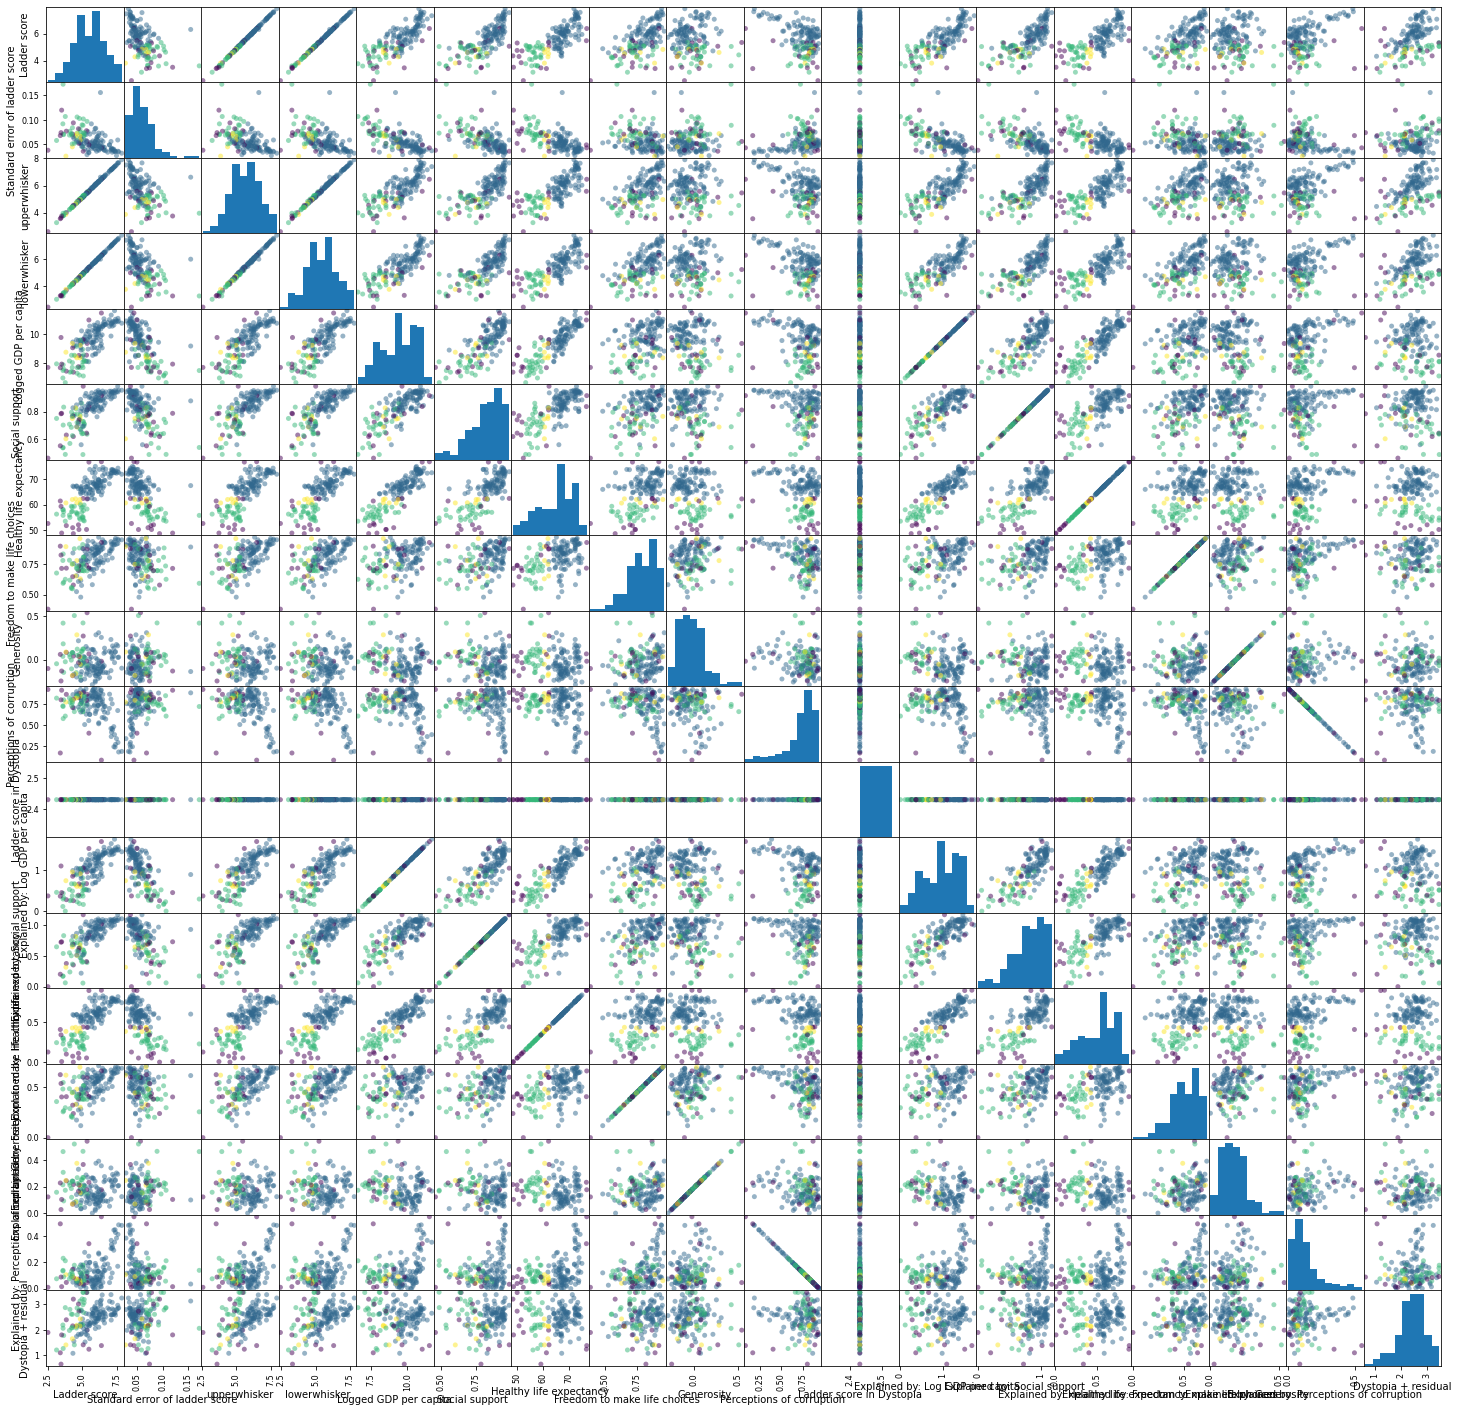

In [44]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(retData,c=f.cluster_db, figsize=(25,25), s=100)
#plt.show()
plt.savefig('plotter.png',dpi=600)

使用散点图矩阵图，可以两两发现特征之间的联系

pd.plotting.scatter_matrix(frame, alpha=0.5, c,figsize=None, ax=None, diagonal='hist', marker='.', density_kwds=None,hist_kwds=None, range_padding=0.05, **kwds)

    1、frame，pandas dataframe对象
    2、alpha， 图像透明度，一般取(0,1]
    3、figsize，以英寸为单位的图像大小，一般以元组 (width, height) 形式设置
    4、ax，可选一般为none
    5、diagonal，必须且只能在{‘hist', ‘kde'}中选择1个，'hist'表示直方图(Histogram plot),'kde'表示核密度估计(Kernel Density Estimation)；该参数是scatter_matrix函数的关键参数
    6、marker，Matplotlib可用的标记类型，如'.'，','，'o'等
    7、density_kwds，(other plotting keyword arguments，可选)，与kde相关的字典参数
    8、hist_kwds，与hist相关的字典参数
    9、range_padding，(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点
    10、kwds，与scatter_matrix函数本身相关的字典参数
    11、c，颜色

我们可以从上面这个图里观察聚类效果的好坏，但是当数据量很大，或者指标很多的时候，
观察起来就会非常麻烦。

In [45]:
from sklearn import metrics
# 就是下面这个函数可以计算轮廓系数
score = metrics.silhouette_score(retData,f.cluster_db)
print(score)

0.28381997008774335


## 聚类 —— 图像分割应用 用KMeans实现

#### 图像分割：

利用图像的灰度、颜色、纹理、形状等特征，
把图像分成若干个互不重叠的区域，并使这些特征在同一区域内呈现相似性，
在不同的区域之间存在明显的差异性。
然后就可以将分割的图像中具有独特性质的区域提取出来用于不同的研究。

图像分割技术已在实际生活中得到广泛的应用。
例如：在机车检验领域，
可以应用到轮毂裂纹图像的分割，及时发现裂纹，保证行车安全；
在生物医学工程方面，
对肝脏CT图像进行分割，
为临床治疗和病理学研究提供帮助。

图像分割常用方法：

    1. 阈值分割：对图像灰度值进行度量，设置不同类别的阈值，达到分割的目的。
    2. 边缘分割：对图像边缘进行检测，即检测图像中灰度值发生跳变的地方，则为一片
    区域的边缘。
    3. 直方图法：对图像的颜色建立直方图，而直方图的波峰波谷能够表示一块区域的颜
    色值的范围，来达到分割的目的。
    4. 特定理论：基于聚类分析、小波变换等理论完成图像分割。

目标：利用K-means聚类算法对图像像素点颜色进行聚类实现简单的图像分割
输出：同一聚类中的点使用相同颜色标记，不同聚类颜色不同

## 使用算法：Kmeans

实现步骤：

    1.建立工程并导入sklearn包
    2.加载图片并进行预处理
    3.加载Kmeans聚类算法
    4.对像素点进行聚类并输出


In [2]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

2. 加载图片进行预处理

In [3]:
def load_Pic(filrPath):
    '''
    :param filrPath:
    :return: NAN
    '''
    data = []
    with open(filrPath,'rb') as f:  # 二进制开文件
        img = Image.open(f)         # 列表形式返回图片像素值
        m,n = img.size
        for i in range(m):
            for j in range(n):
                x,y,z = img.getpixel((i,j))
                data.append([x/256.0,y/256.0,z/256.0])  # RGB颜色处理到0-1 放入data

    f.close()
    return np.mat(data), m, n  # 返回矩阵格式和形状大小

imgData, m, n = load_Pic('Pic/punk.jpg')

# 加载KMeans算法

label = KMeans(n_clusters=4).fit_predict(imgData)


# 像素点聚类输出

label = label.reshape([m,n])
pic_new = Image.new("L", (m, n))
for i in range(m):
    for j in range(n):
        pic_new.putpixel((i,j), int(256/(label[i][j]+1)))
pic_new.save("result-bull-4.jpg", "JPEG")

## 总结

通过设置不同的k值，能够得到不同的聚类结果。

同时，k值的不确定也是Kmeans算法的一个缺点。
往往为了达到好的实验结果，需要进行多次尝试才能够选取最优的k值。

而像密度、层次聚类的算法，就无需指定k值，只要给定限制条件，就能自动地得到类别数k
